
# RNN Dead Layer Fit Project 
## Train on FCCD ONLY, all DLFs=1 


# Import general packages

In [1]:
#check env
import os
print (os.environ['CONDA_DEFAULT_ENV'])

/unix/legend/abi/ML_DL/MLenv


In [2]:
#General
import sys
import json
import yaml
import pandas as pd

#RNN imports
import numpy as np
import os
import argparse
import time
import math
import random
import torch.nn as nn
import torch.optim as optim
from torch.nn.parameter import Parameter
from torch.nn import init
import torch.nn.functional as F
import torch
import torch.utils.data as data_utils
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import gzip
import pickle
import numpy as np
from torch.autograd import Variable
from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import torchsnooper #problem installing: !pip install torchsnooper --user #this worked for installing torchsnooper
import h5py
import re
from tqdm import tqdm
from torch.cuda.amp import autocast

torch.cuda.empty_cache()


DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# DEVICE = torch.device("cuda:0")
print(DEVICE)
torch.cuda.is_available()

/unix/legend/abi/ML_DL/MLenv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda:0


True

# Import dataset and RNN functions

In [3]:
from src.data import *
from src.RNN import *
from src.functions import *

# Get relevant paths

In [4]:
# Data paths:
CodePath = os.path.dirname(os.path.abspath("__file__"))
DATA_PATH = CodePath+"/data/V05268A_data/data_hist_Ba_V05268A.h5"
MC_PATH = CodePath+"/data/V05268A_data/training_data_V05268A_FCCDonly/"


print(MC_PATH)

/unix/legend/abi/ML_DL/RNN_DeadLayerFit/data/V05268A_data/training_data_V05268A_FCCDonly/


# -------------------------------------------------------
# WORKFLOW
# -------------------------------------------------------

# Baseline Training: Full dataset, Normal Attention

In [5]:
NUM_EPOCHS = 20 #can try increasing
LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000
RNN_ID = "RNN_FCCDonly_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_fulldataset_"+str(dataset_size)+"trials"

#initialise directories to save
if not os.path.exists(CodePath+"/saved_models/"+RNN_ID+"/plots/"):
    os.makedirs(CodePath+"/saved_models/"+RNN_ID+"/plots/")

## Training  (DO NOT RERUN UNLESS NECESSARY)

100%|█████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 200.83it/s]


(1000, 900)
RNN_FCCDonly_20epochs_LR0.005_fulldataset_10000trials
#params 2105857
Warmup Size: 400
- - - - - - - - - - -

EPOCH:  1 / 20
Training network...
Epoch [1/20], Iter [1750/1750] Loss: 0.7575
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:07<00:00, 11.19it/s]


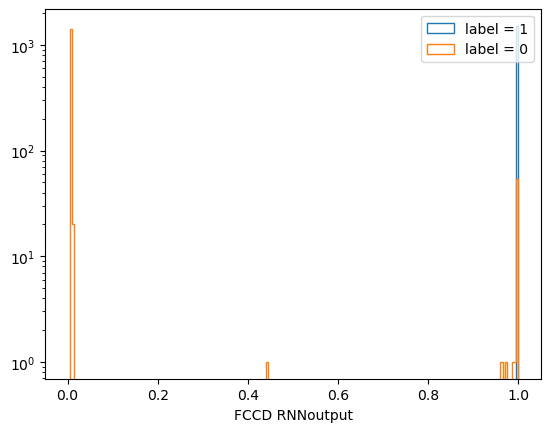

accuracy_FCCD:  0.9806666666666667

EPOCH:  2 / 20
Training network...
Epoch [2/20], Iter [1750/1750] Loss: 0.0203
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.31it/s]


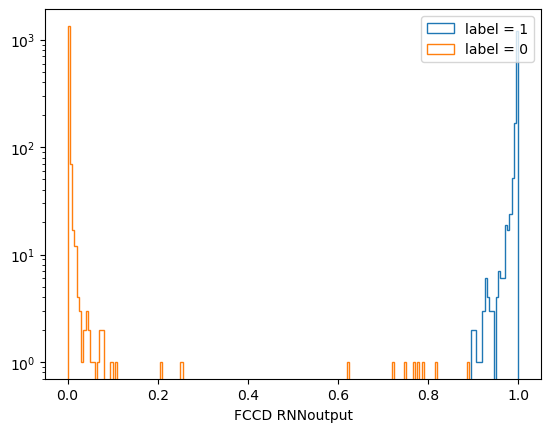

accuracy_FCCD:  0.9973333333333333

EPOCH:  3 / 20
Training network...
Epoch [3/20], Iter [1750/1750] Loss: 0.0020
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.27it/s]


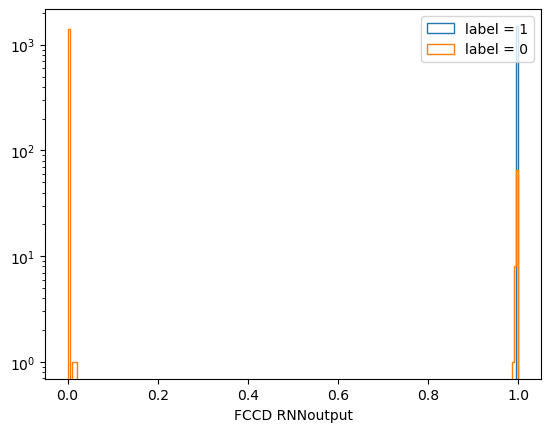

accuracy_FCCD:  0.975

EPOCH:  4 / 20
Training network...
Epoch [4/20], Iter [1750/1750] Loss: 0.6585
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:07<00:00, 11.17it/s]


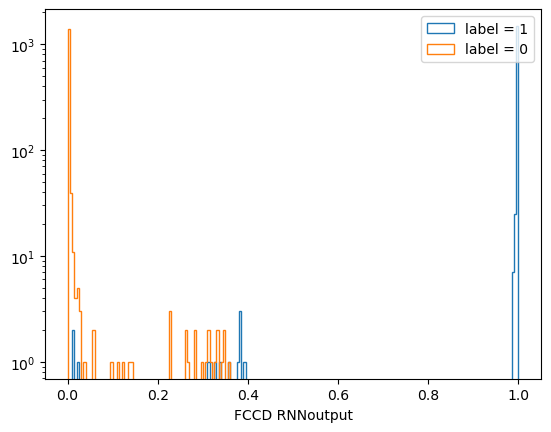

accuracy_FCCD:  0.996

EPOCH:  5 / 20
Training network...
Epoch [5/20], Iter [1750/1750] Loss: 0.0017
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.27it/s]


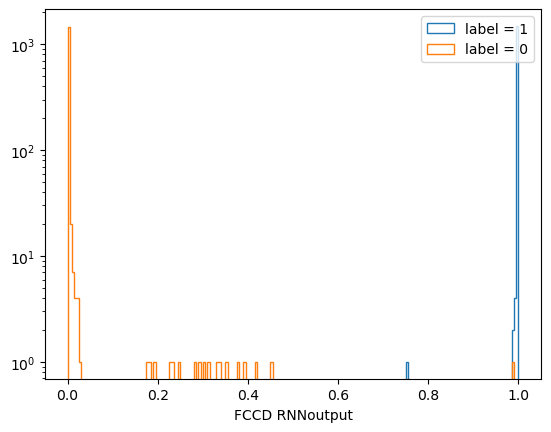

accuracy_FCCD:  0.9996666666666667

EPOCH:  6 / 20
Training network...
Epoch [6/20], Iter [1750/1750] Loss: 0.0009
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.28it/s]


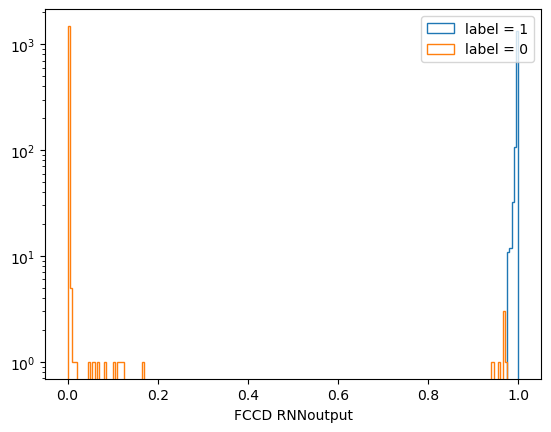

accuracy_FCCD:  0.998

EPOCH:  7 / 20
Training network...
Epoch [7/20], Iter [1750/1750] Loss: 0.0006
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.26it/s]


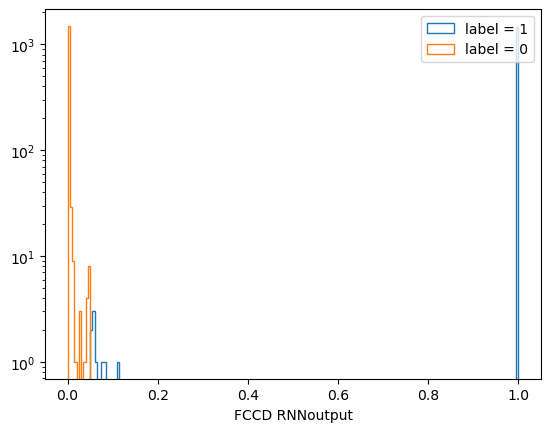

accuracy_FCCD:  0.997

EPOCH:  8 / 20
Training network...
Epoch [8/20], Iter [1750/1750] Loss: 0.0096
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:05<00:00, 11.38it/s]


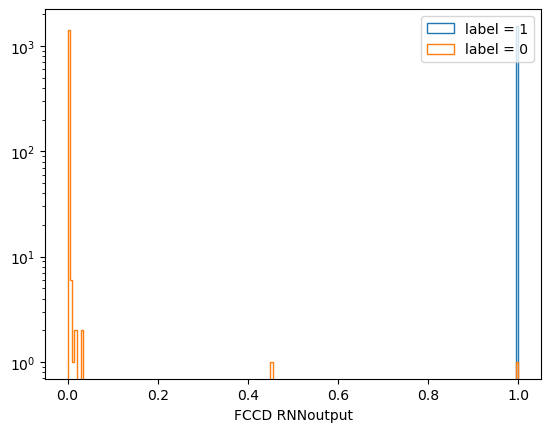

accuracy_FCCD:  0.9996666666666667

EPOCH:  9 / 20
Training network...
Epoch [9/20], Iter [1750/1750] Loss: 0.0006
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:05<00:00, 11.37it/s]


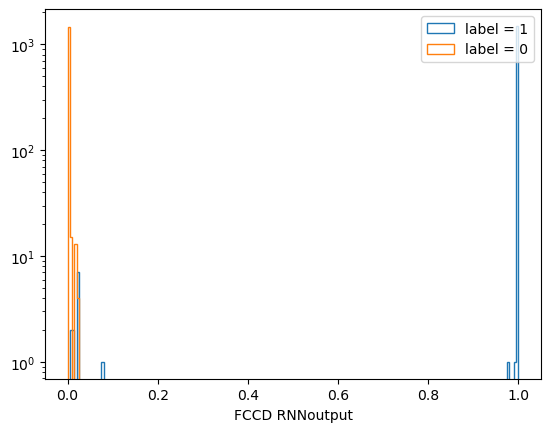

accuracy_FCCD:  0.996

EPOCH:  10 / 20
Training network...
Epoch [10/20], Iter [1750/1750] Loss: 0.0106
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:07<00:00, 11.18it/s]


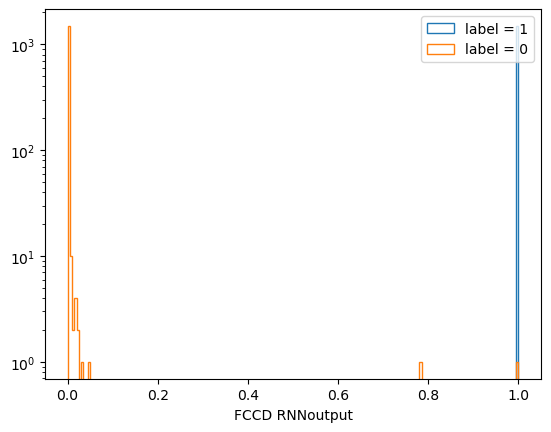

accuracy_FCCD:  0.9993333333333333

EPOCH:  11 / 20
Training network...
Epoch [11/20], Iter [1750/1750] Loss: 0.0005
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.20it/s]


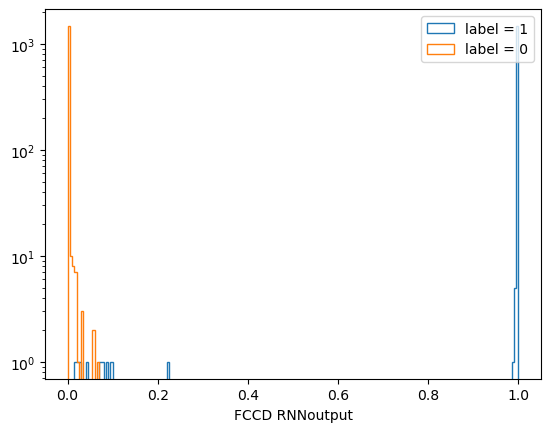

accuracy_FCCD:  0.997

EPOCH:  12 / 20
Training network...
Epoch [12/20], Iter [1750/1750] Loss: 0.0065
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.22it/s]


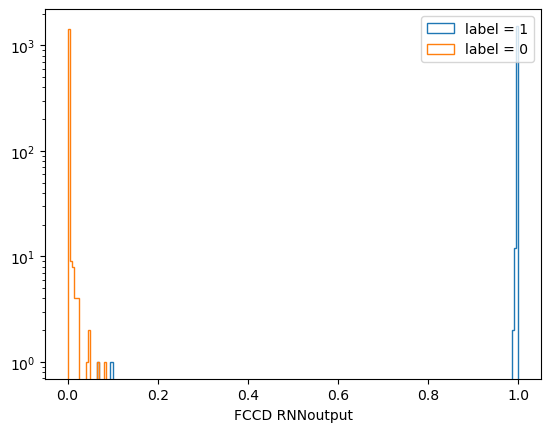

accuracy_FCCD:  0.9993333333333333

EPOCH:  13 / 20
Training network...
Epoch [13/20], Iter [1750/1750] Loss: 0.0008
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.34it/s]


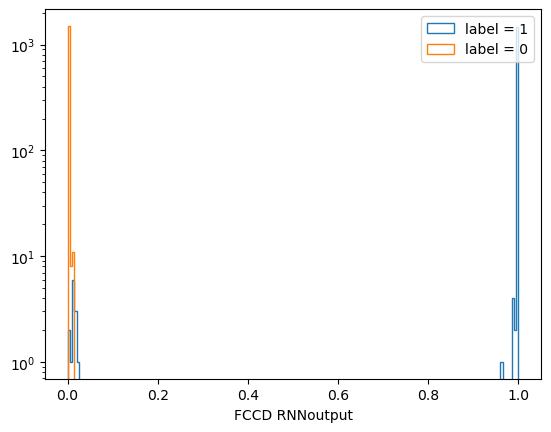

accuracy_FCCD:  0.9956666666666667

EPOCH:  14 / 20
Training network...
Epoch [14/20], Iter [1750/1750] Loss: 0.0004
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.28it/s]


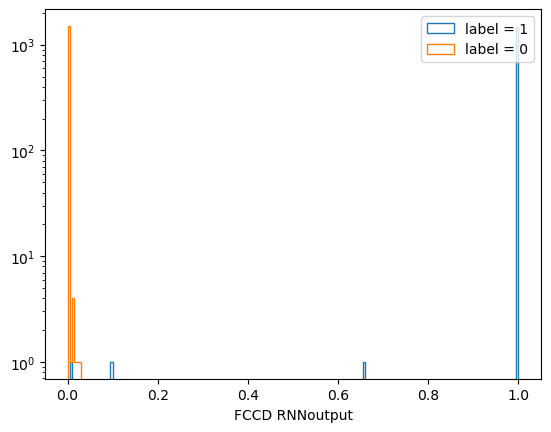

accuracy_FCCD:  0.9993333333333333

EPOCH:  15 / 20
Training network...
Epoch [15/20], Iter [1750/1750] Loss: 0.0060
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.24it/s]


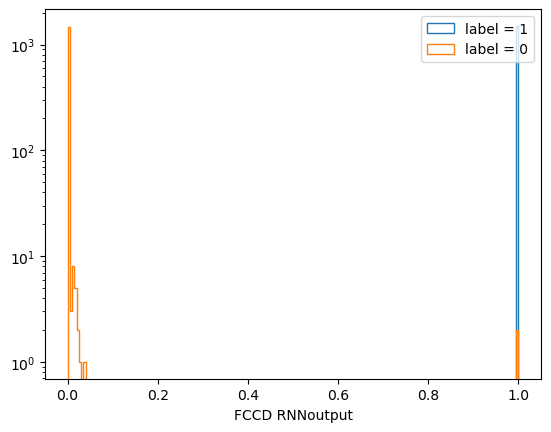

accuracy_FCCD:  0.9993333333333333

EPOCH:  16 / 20
Training network...
Epoch [16/20], Iter [1750/1750] Loss: 0.0067
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.36it/s]


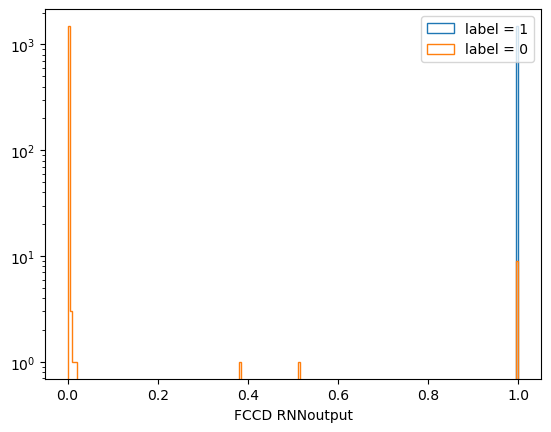

accuracy_FCCD:  0.9966666666666667

EPOCH:  17 / 20
Training network...
Epoch [17/20], Iter [1750/1750] Loss: 0.6097
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.20it/s]


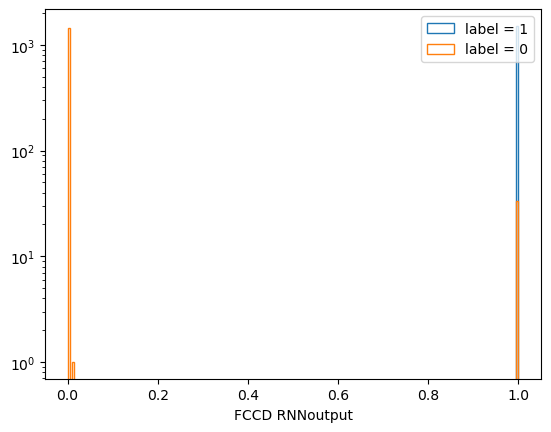

accuracy_FCCD:  0.989

EPOCH:  18 / 20
Training network...
Epoch [18/20], Iter [1750/1750] Loss: 0.0073
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.32it/s]


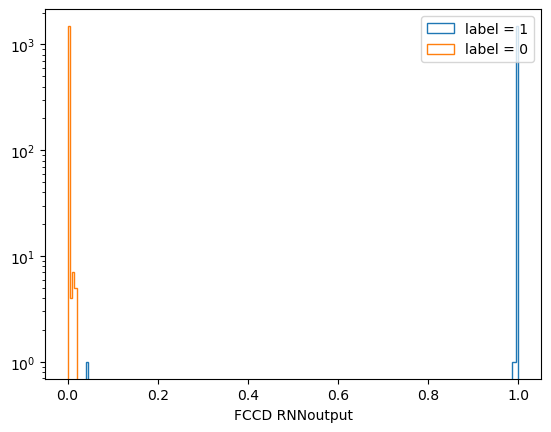

accuracy_FCCD:  0.9996666666666667

EPOCH:  19 / 20
Training network...
Epoch [19/20], Iter [1750/1750] Loss: 0.0056
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.31it/s]


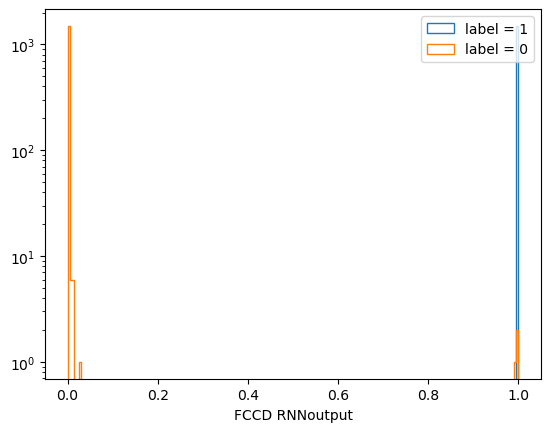

accuracy_FCCD:  0.999

EPOCH:  20 / 20
Training network...
Epoch [20/20], Iter [1750/1750] Loss: 0.0073
Testing/Validating...


100%|████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.24it/s]


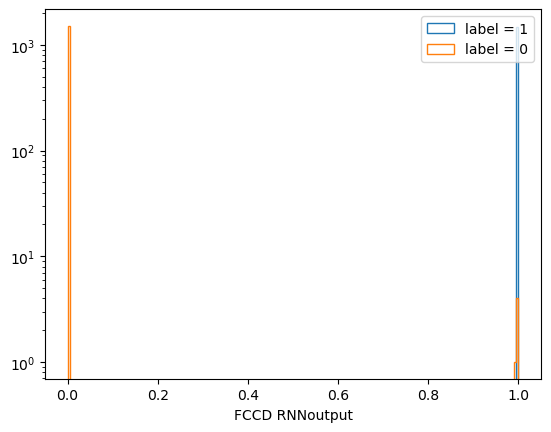

accuracy_FCCD:  0.9983333333333333

Training complete.

Saving RNN at /unix/legend/abi/ML_DL/RNN_DeadLayerFit/saved_models/RNN_FCCDonly_20epochs_LR0.005_fulldataset_10000trials/RNN_FCCDonly_20epochs_LR0.005_fulldataset_10000trials.pkl


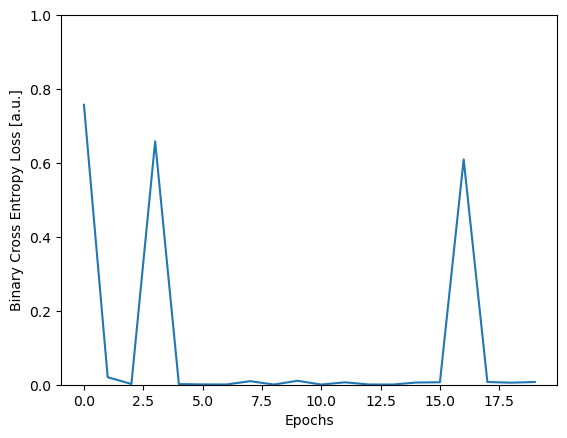

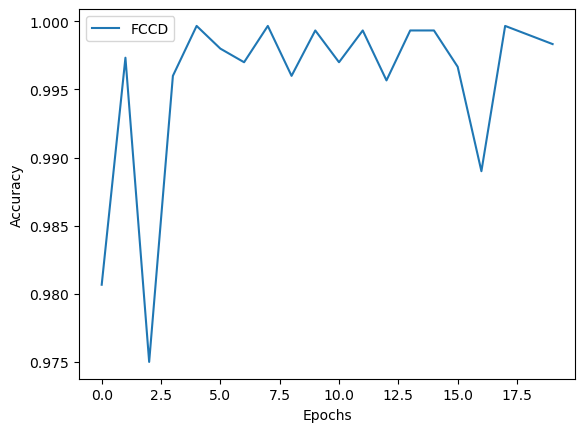

In [6]:
# #load dataset
# BATCH_SIZE = 4 
# train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size, path = MC_PATH)

# #run training
# FCCD_accuracy_values, loss_values = train_RNN(dataset, train_loader, test_loader, NUM_EPOCHS, LEARNING_RATE, saveRNN=True, plot_training_results = True, RNN_ID = RNN_ID, FCCDonly = True)


In [ ]:
# #Training Results
# training_results(NUM_EPOCHS, loss_values, FCCD_accuracy_values, DLF_accuracy_values, save_plots = False, RNN_ID = RNN_ID)


## Testing

In [6]:
#load dataset again
BATCH_SIZE = 4 
train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size, path = MC_PATH)

100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 225.97it/s]

(1000, 900)


In [7]:
# Load saved model
RNNclassifier_fulldataset = RNN(dataset.get_histlen(),1)
model_path = CodePath+"/saved_models/"+RNN_ID+"/"+RNN_ID+".pkl"
RNNclassifier_fulldataset.load_state_dict(torch.load(model_path))
RNNclassifier_fulldataset.eval()

RNN(
  (RNNLayer): GRU(1, 256, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fcnet): FCNet(
    (fcnet): Sequential(
      (0): Linear(in_features=1024, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Dropout(p=0.2, inplace=False)
      (4): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (attention_weight): Linear(in_features=512, out_features=512, bias=False)
)

Selected decision thresholds: FCCD =  0.5 , DLF =  0.5


100%|█████████████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.21it/s]


FCCD accuracies: 
total:  3000
TP:  1504
FP:  8
TN:  1488
FN:  0
accuracy:  0.9973333333333333
precision:  0.9947089947089947
recall:  1.0

roc auc FCCD:  0.9999995555523951

Total # misclassified trials FCCD:  8  / 3000


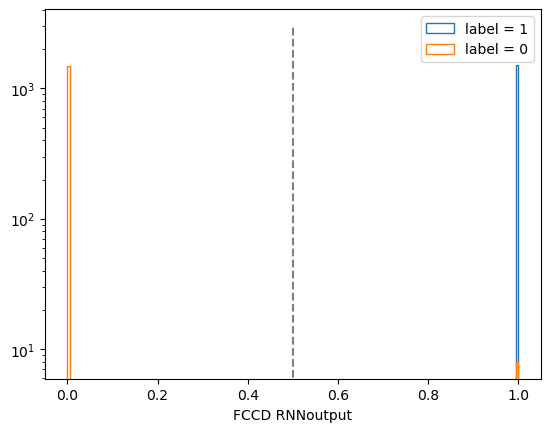

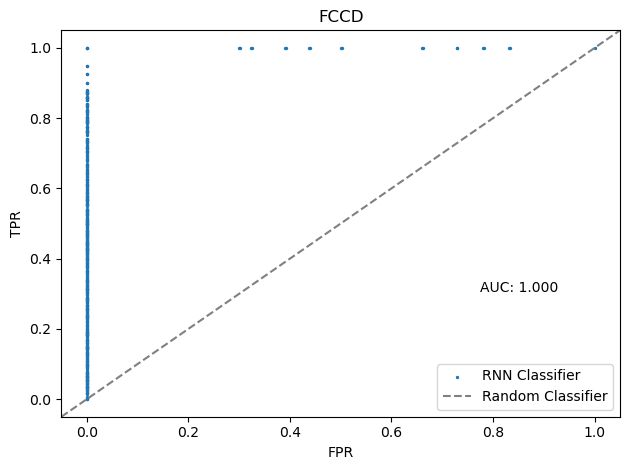

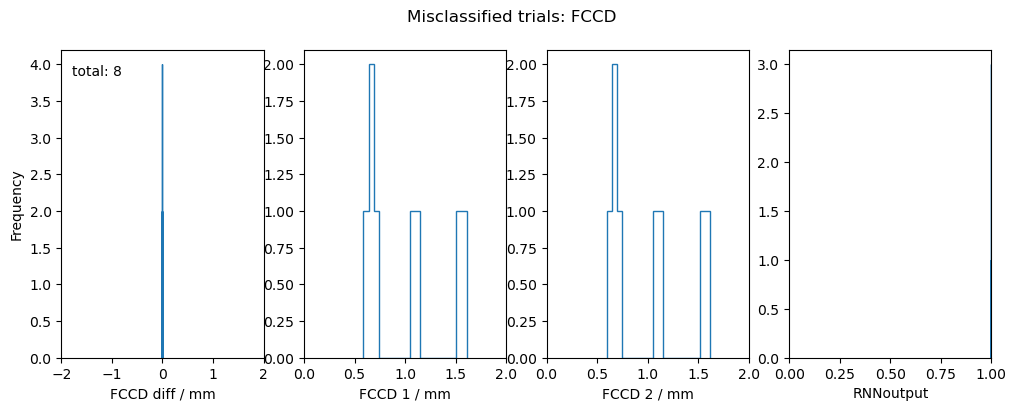

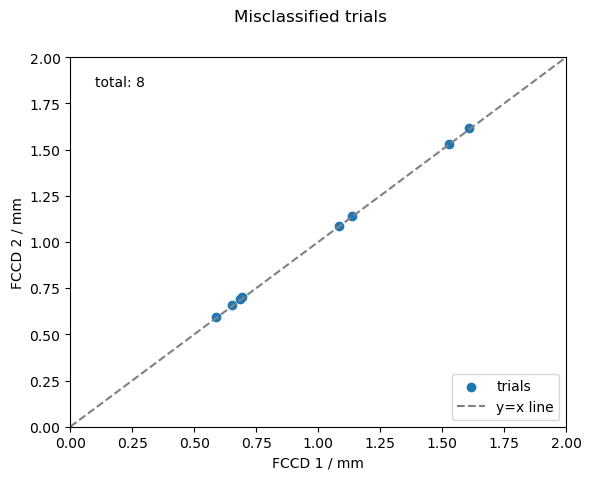

In [8]:
#testing
accuracies_fulldataset = test_RNN(RNNclassifier_fulldataset, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve=True, FCCDonly=True)


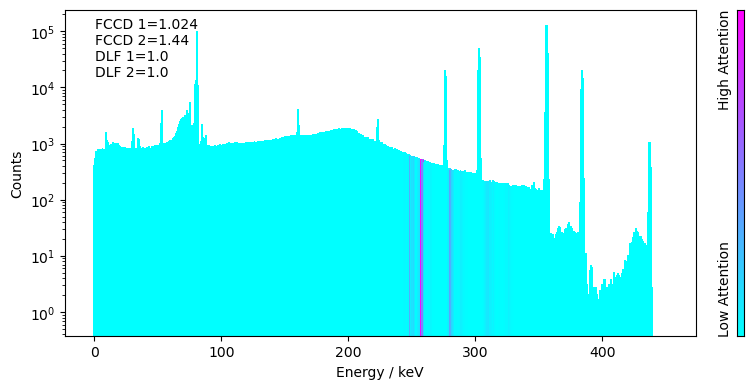

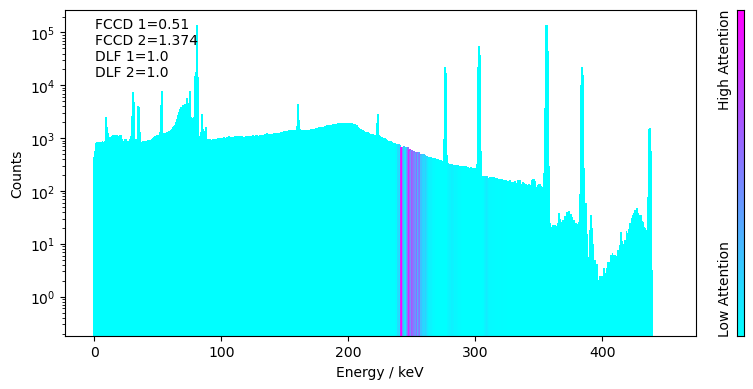

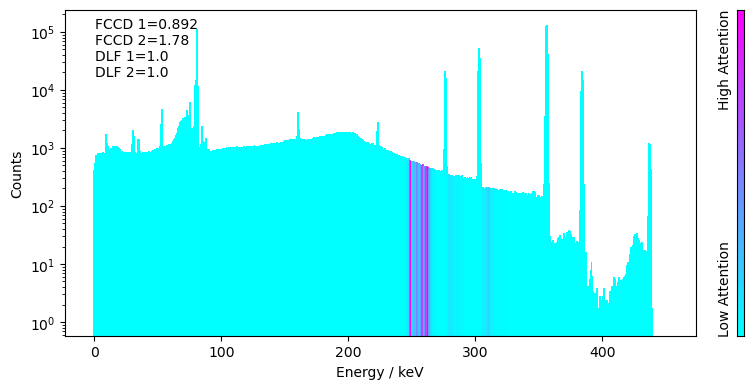

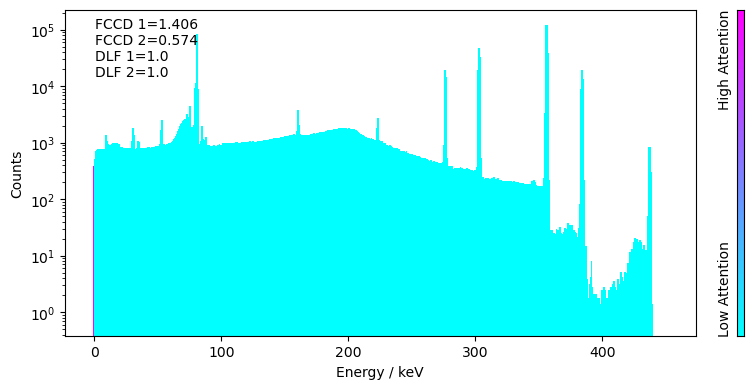

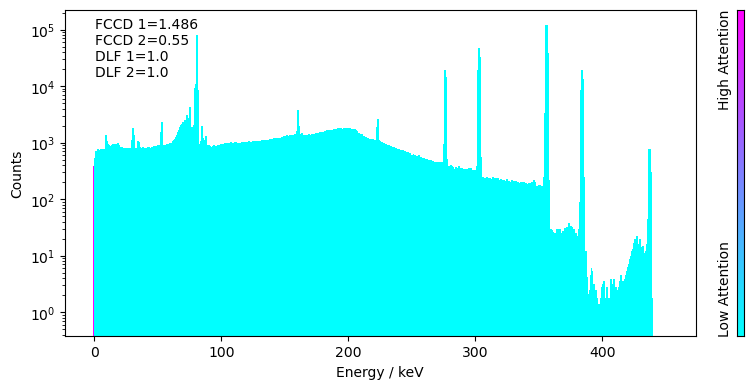

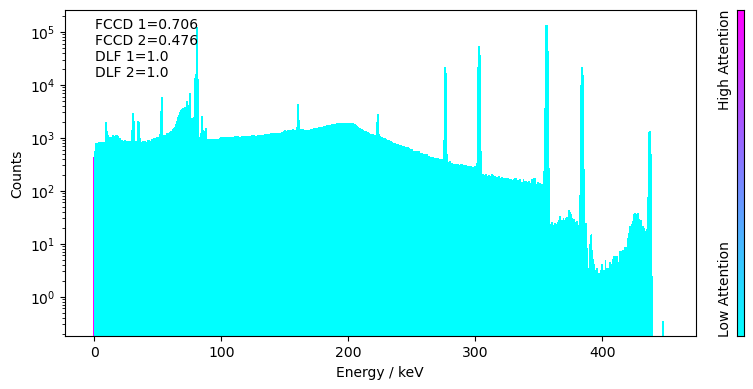

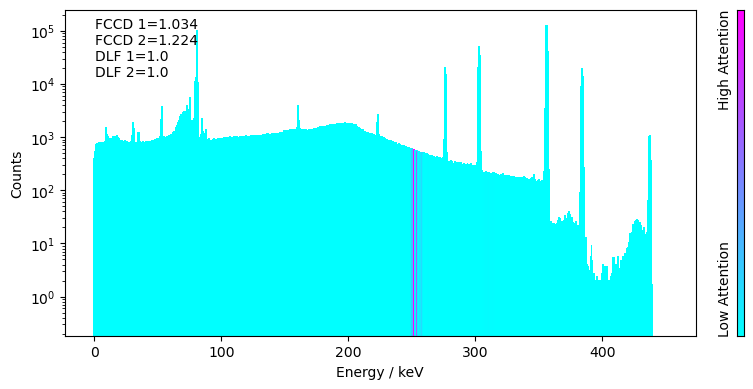

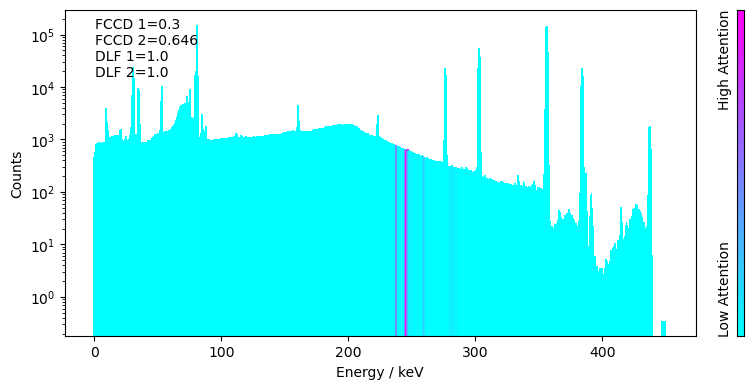

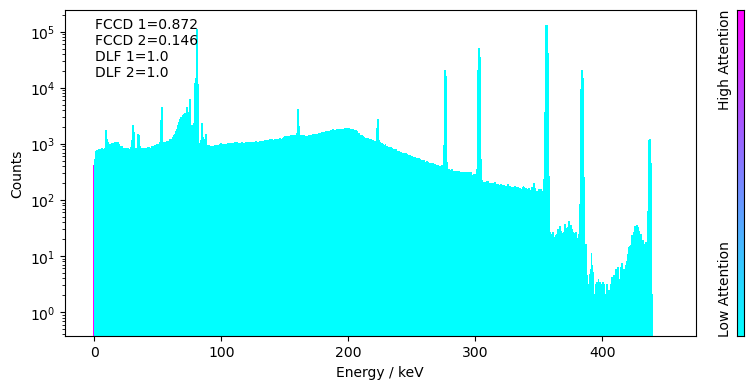

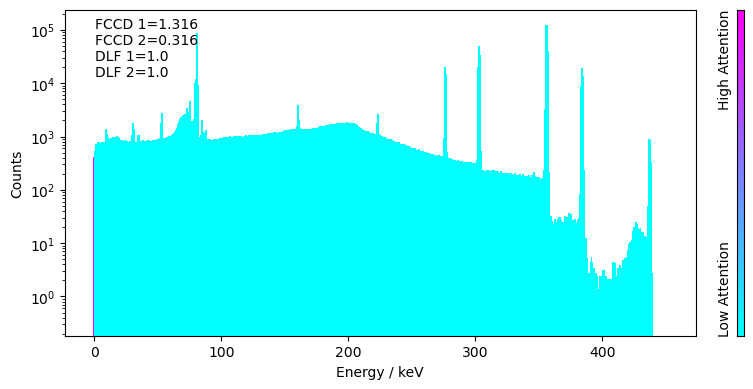

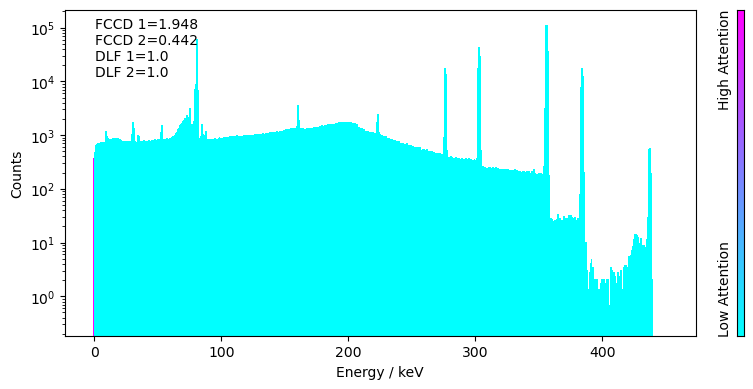

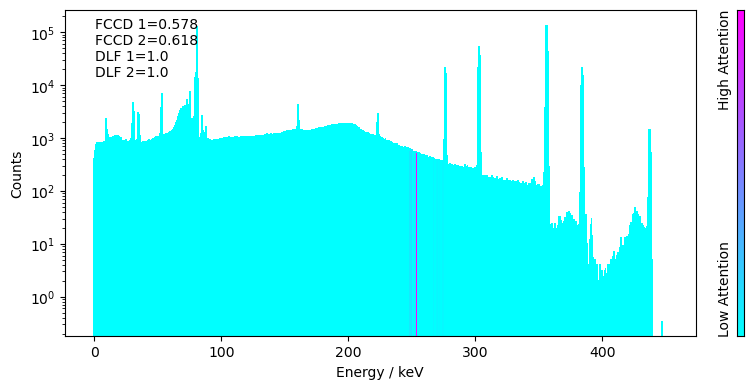

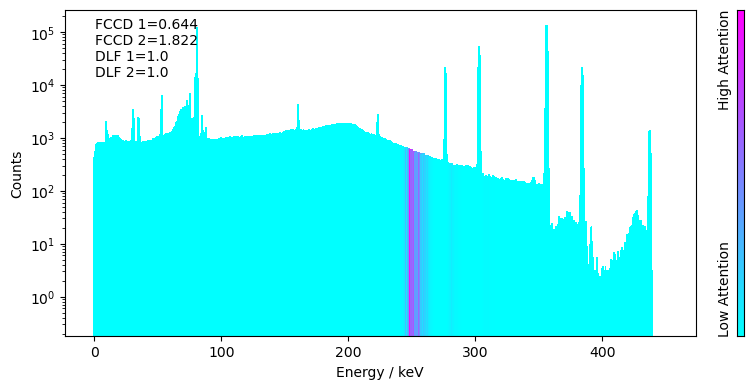

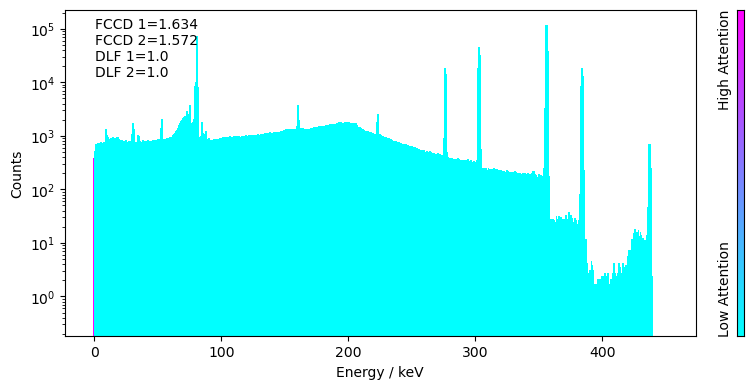

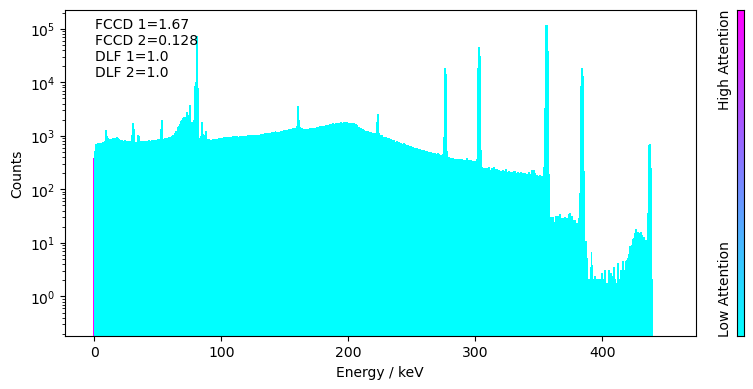

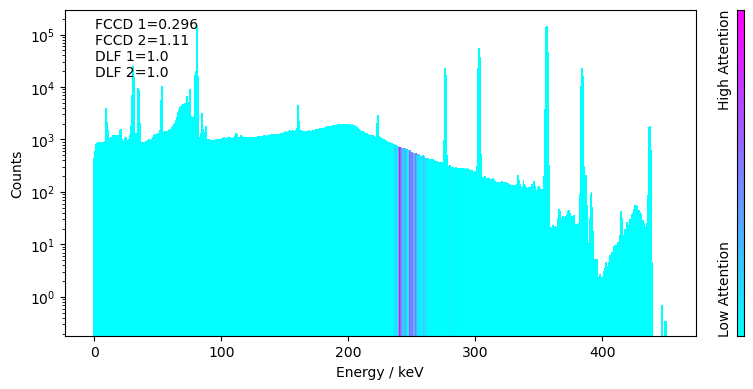

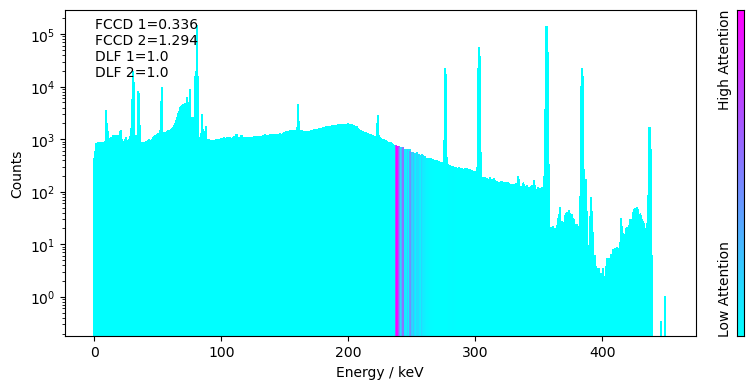

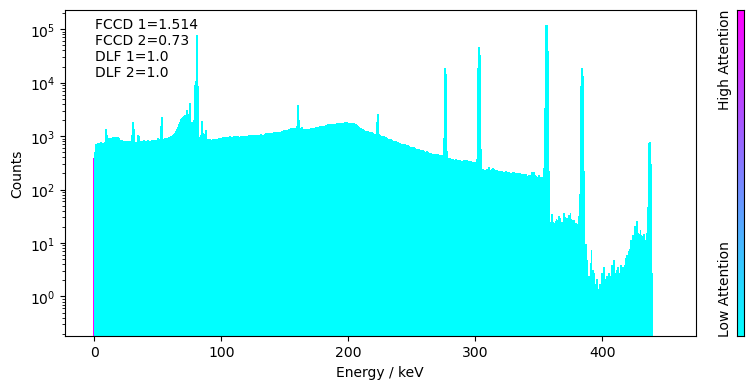

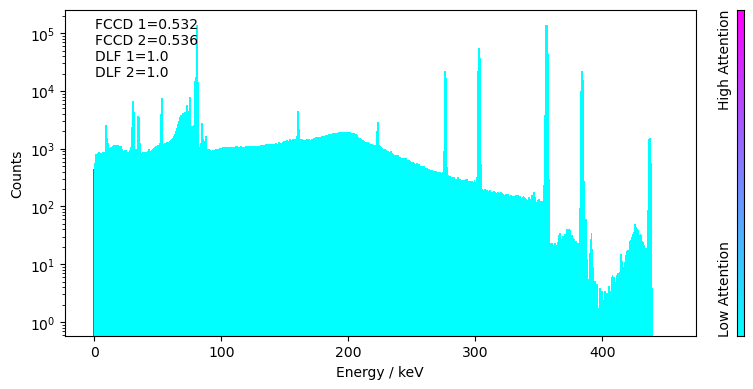

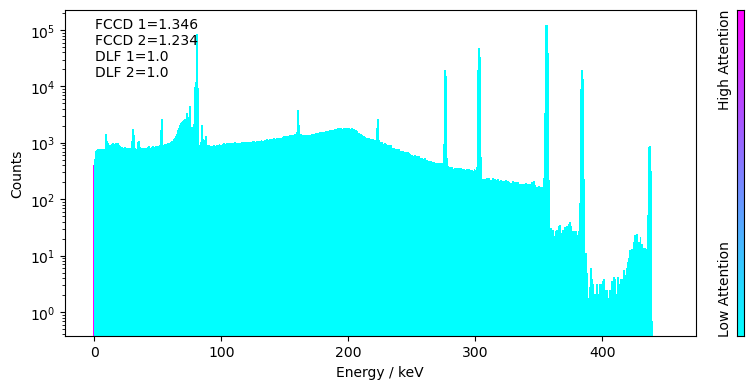

In [9]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, FCCDonly=True)
    

100%|█████████████████████████████████████████████████████████████████████████| 750/750 [01:06<00:00, 11.30it/s]


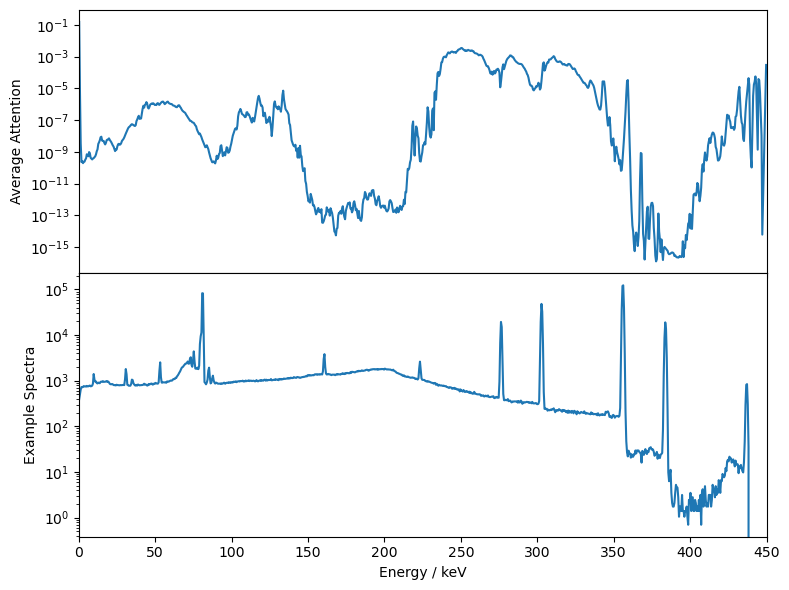

In [10]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, RNN_ID=RNN_ID, save_plots = True, FCCDonly=True)


# Restricted Training

In [11]:
NUM_EPOCHS = 20 #can try increasing
LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000
maxFCCDdiff = 0.05
maxDLFdiff = 1.0 #i.e. no restriction
RNN_ID ="RNN_FCCDonly_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_maxFCCDdiff"+str(maxFCCDdiff)+"mm_"+str(dataset_size)+"trials"

#initialise directories to save
if not os.path.exists(CodePath+"/saved_models/"+RNN_ID+"/plots/"):
    os.makedirs(CodePath+"/saved_models/"+RNN_ID+"/plots/")

## Testing - on restricted dataset

In [12]:
#load restricted dataset
BATCH_SIZE = 4 
restrict_dict = {"maxFCCDdiff": maxFCCDdiff, "maxDLFdiff": maxDLFdiff}
train_loader, test_loader, dataset = load_data(BATCH_SIZE, restrict_dataset=True, restrict_dict = restrict_dict, size=dataset_size, path = MC_PATH)

100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 223.75it/s]

(1000, 900)


In [13]:
# Load saved model
RNNclassifier = RNN(dataset.get_histlen(),1)
model_path = CodePath+"/saved_models/"+RNN_ID+"/"+RNN_ID+".pkl"
RNNclassifier.load_state_dict(torch.load(model_path))
RNNclassifier.eval()

RNN(
  (RNNLayer): GRU(1, 256, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fcnet): FCNet(
    (fcnet): Sequential(
      (0): Linear(in_features=1024, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Dropout(p=0.2, inplace=False)
      (4): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (attention_weight): Linear(in_features=512, out_features=512, bias=False)
)

Selected decision thresholds: FCCD =  0.5 , DLF =  0.5


100%|█████████████████████████████████████████████████████████████████████████| 750/750 [01:08<00:00, 10.98it/s]


FCCD accuracies: 
total:  3000
TP:  1436
FP:  0
TN:  1506
FN:  58
accuracy:  0.9806666666666667
precision:  1.0
recall:  0.9611780455153949

roc auc FCCD:  0.9997519960319365

Total # misclassified trials FCCD:  58  / 3000


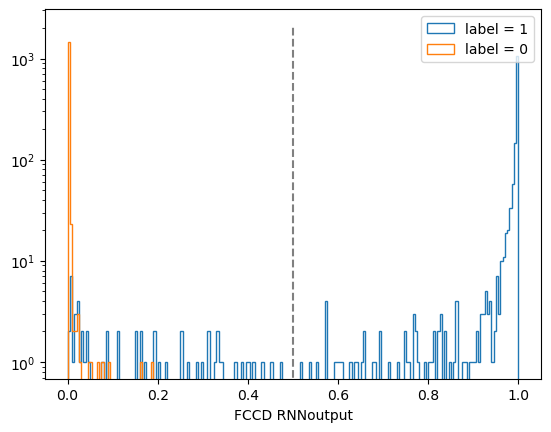

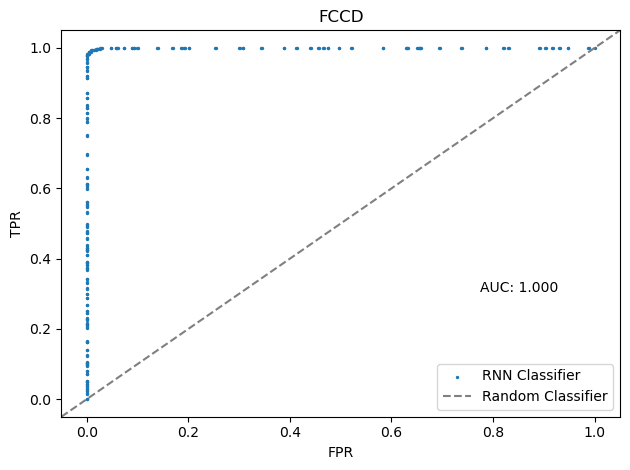

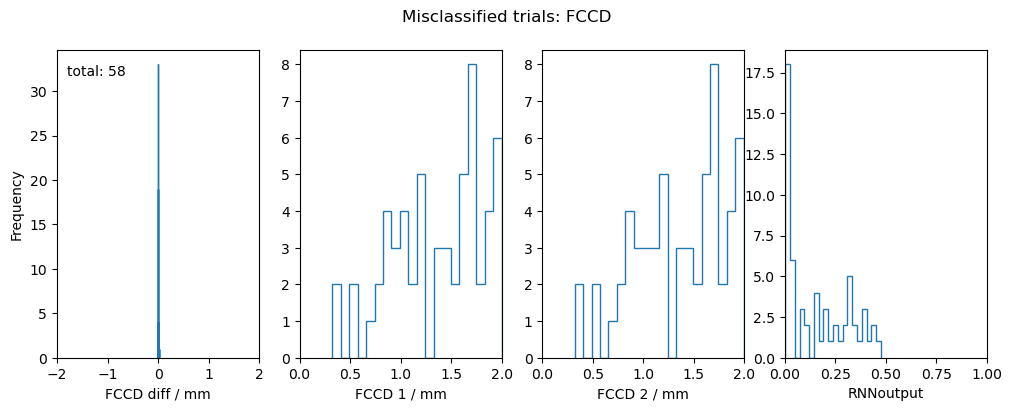

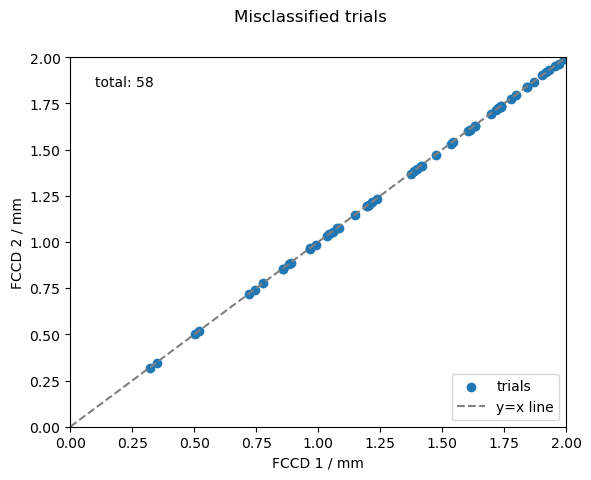

In [14]:
#testing
accuracies = test_RNN(RNNclassifier, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, roc_curve=True, FCCDonly=True)


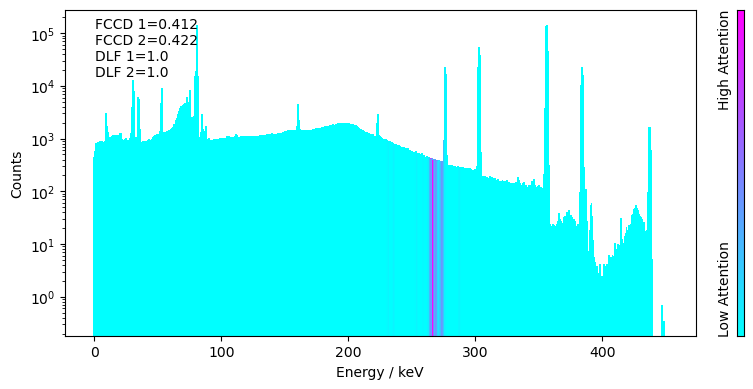

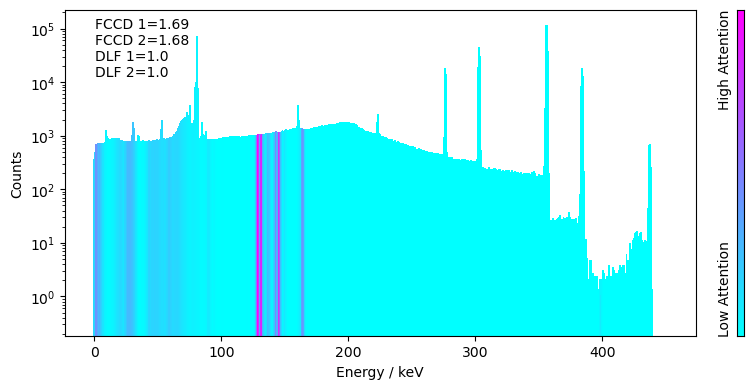

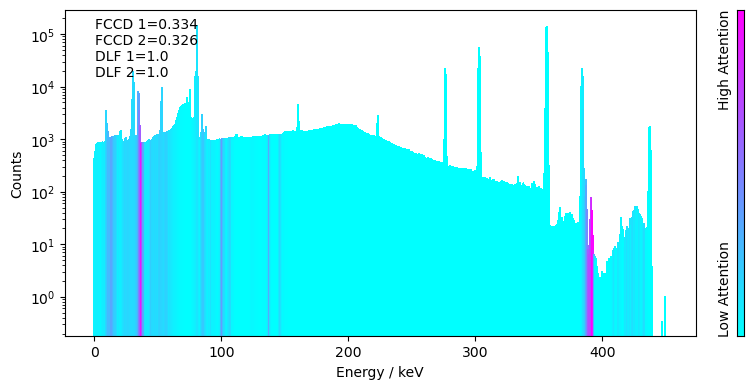

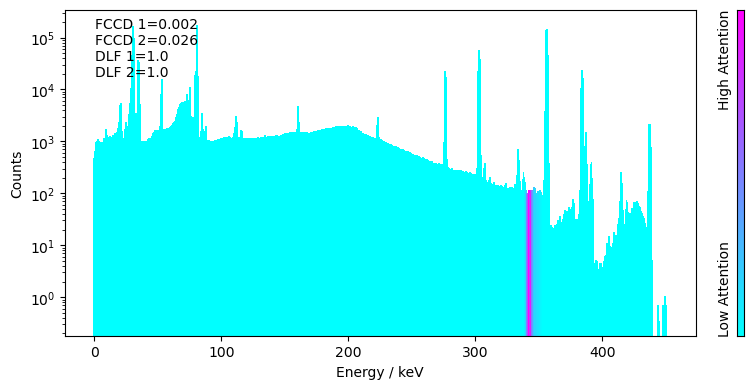

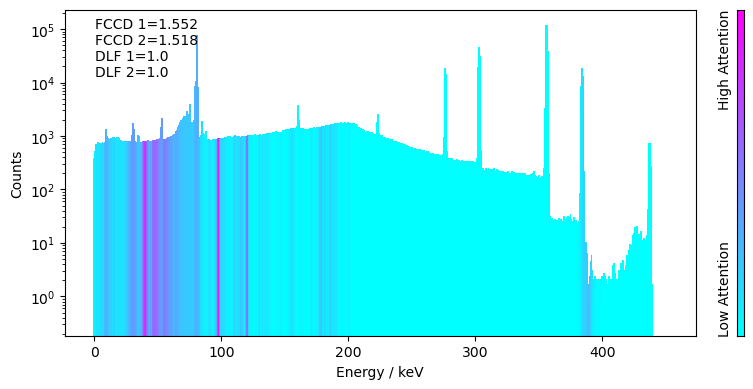

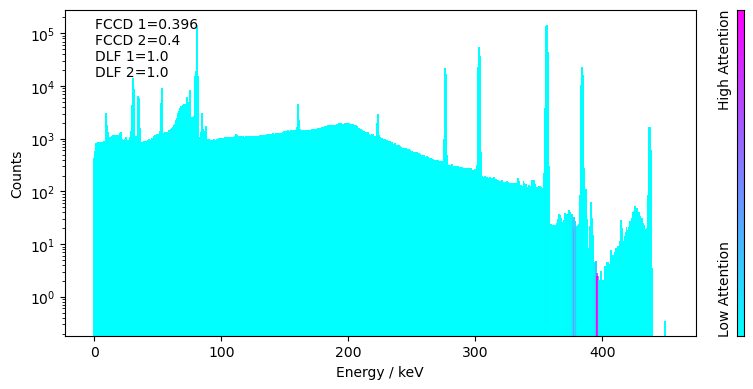

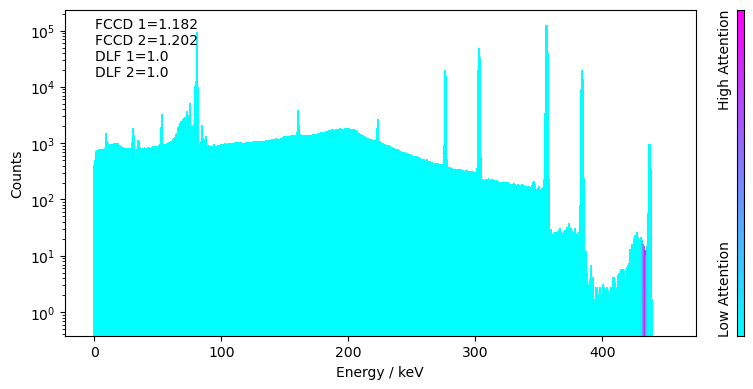

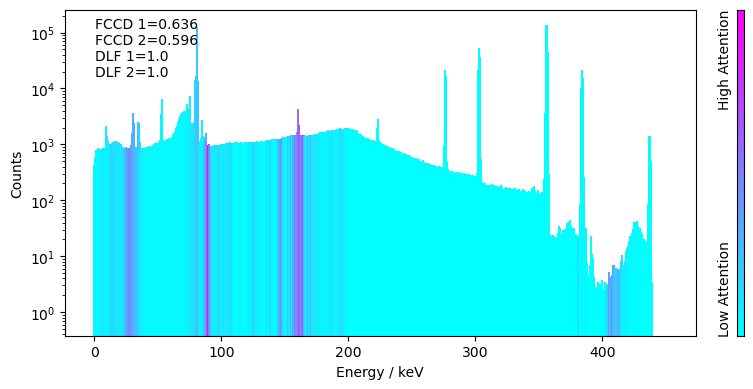

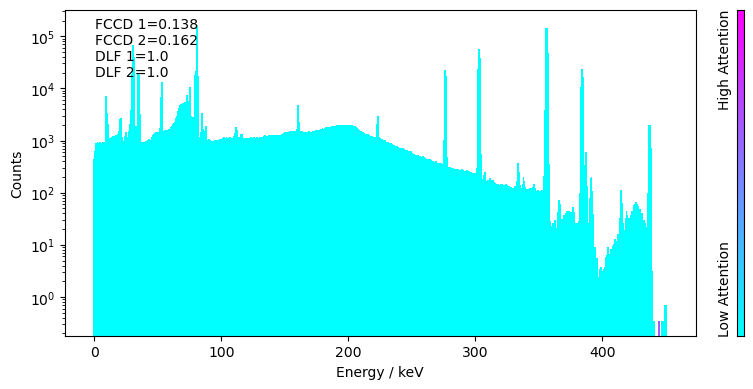

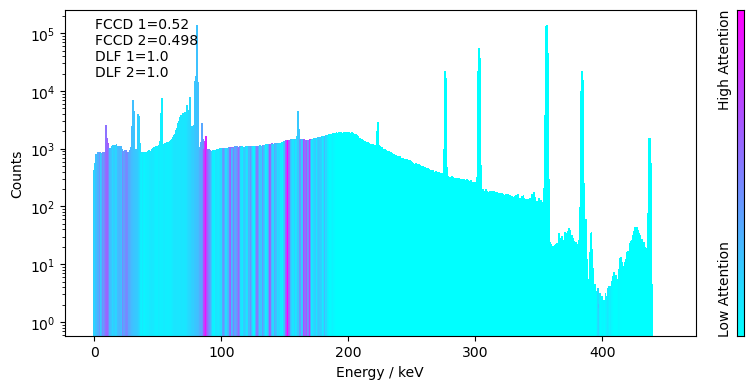

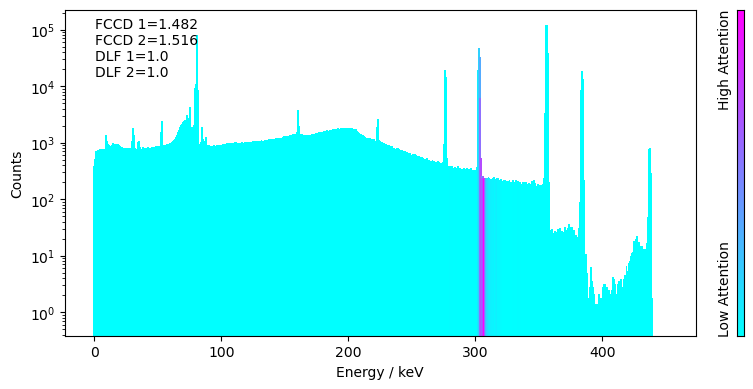

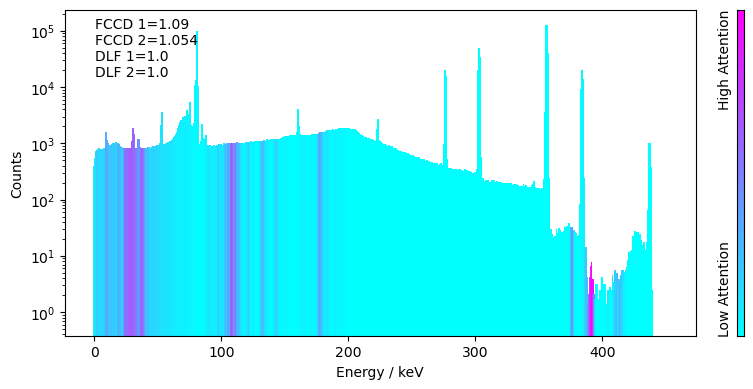

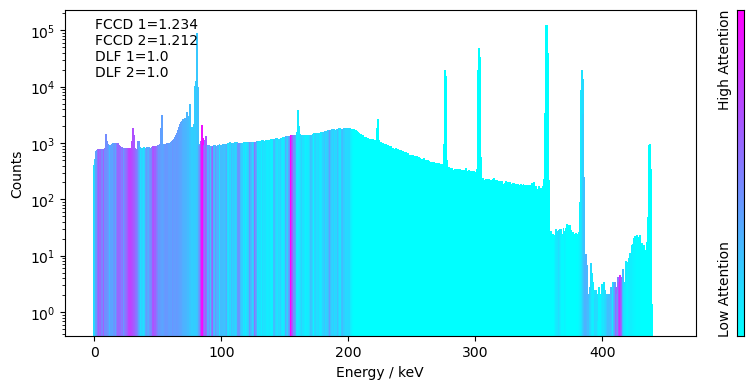

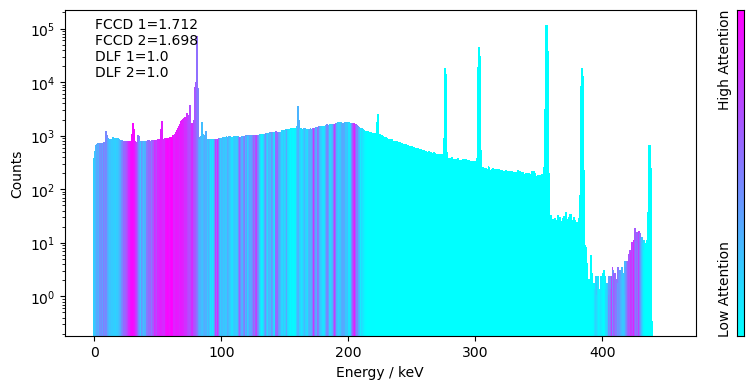

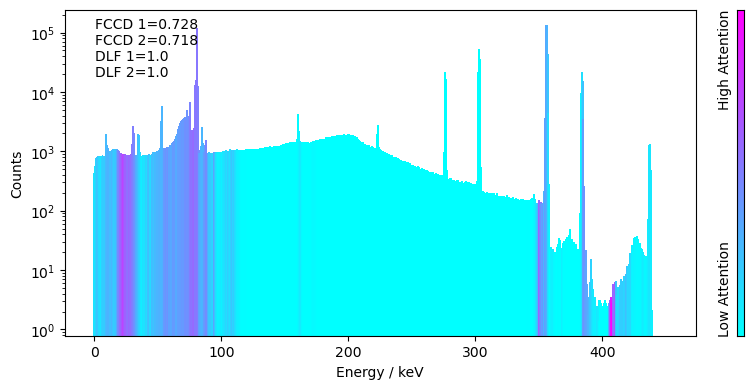

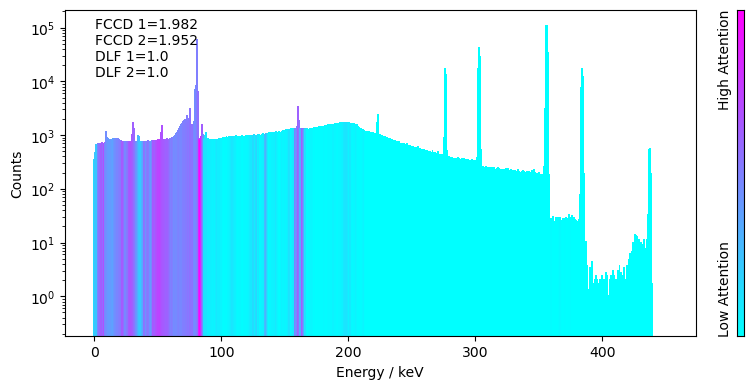

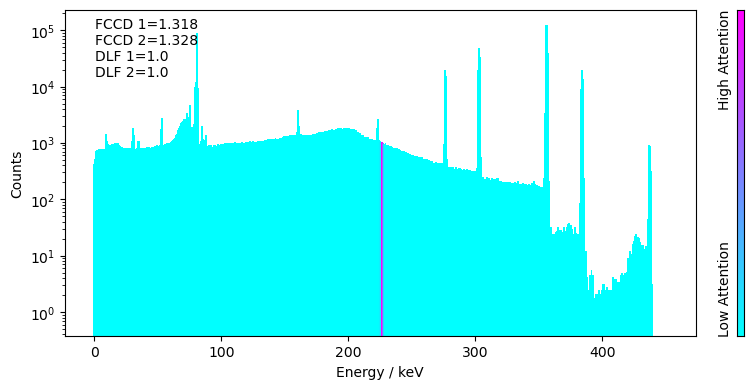

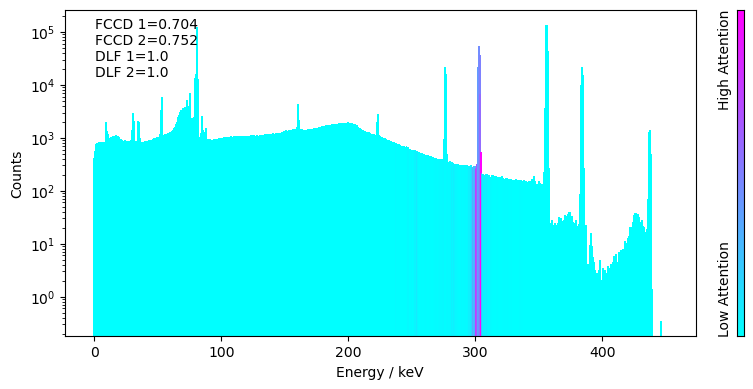

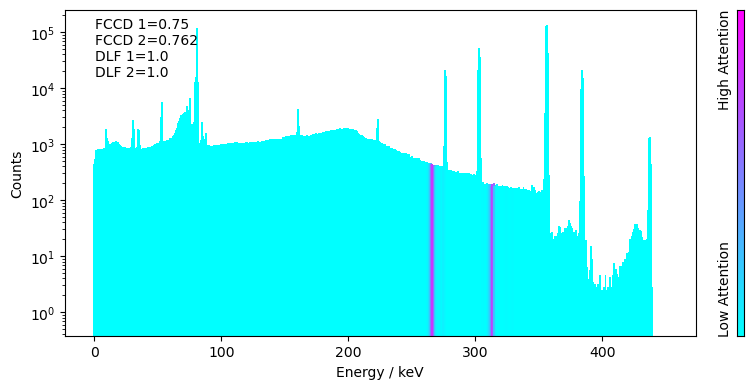

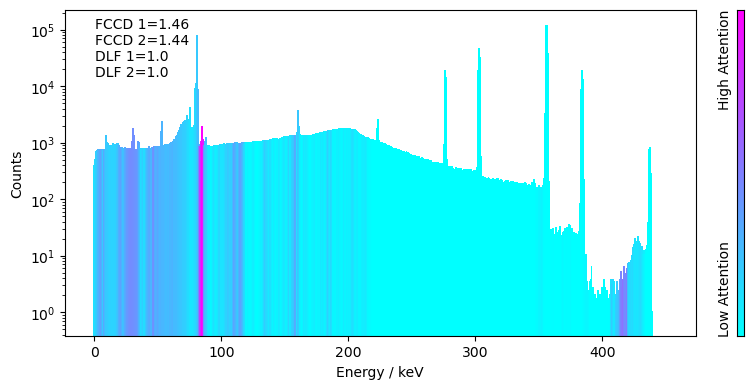

In [15]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, FCCDonly=True)
    

100%|█████████████████████████████████████████████████████████████████████████| 750/750 [01:05<00:00, 11.46it/s]


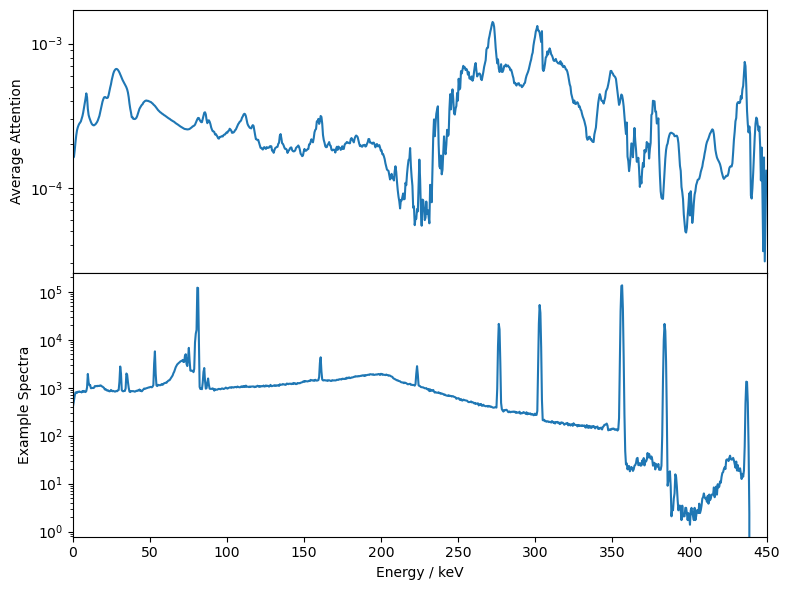

In [16]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, FCCDonly=True)


## Testing - on full dataset

In [17]:
#load full dataset
BATCH_SIZE = 4 
train_loader, test_loader, dataset = load_data(BATCH_SIZE, size=dataset_size, path = MC_PATH)

100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 211.49it/s]

(1000, 900)


Selected decision thresholds: FCCD =  0.5 , DLF =  0.5


100%|█████████████████████████████████████████████████████████████████████████| 750/750 [01:00<00:00, 12.31it/s]


FCCD accuracies: 
total:  3000
TP:  1504
FP:  0
TN:  1496
FN:  0
accuracy:  1.0
precision:  1.0
recall:  1.0

roc auc FCCD:  0.9999999999999999

Total # misclassified trials FCCD:  0  / 3000


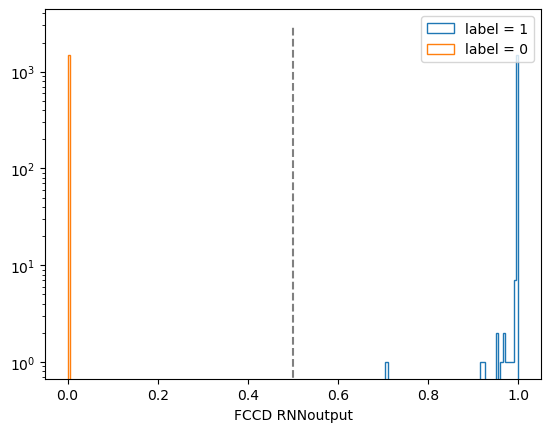

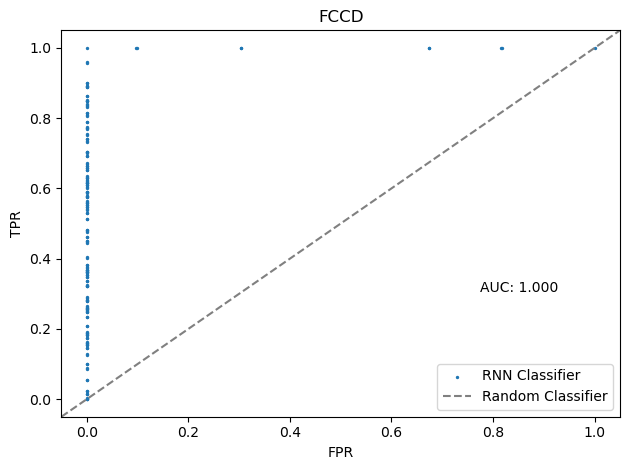

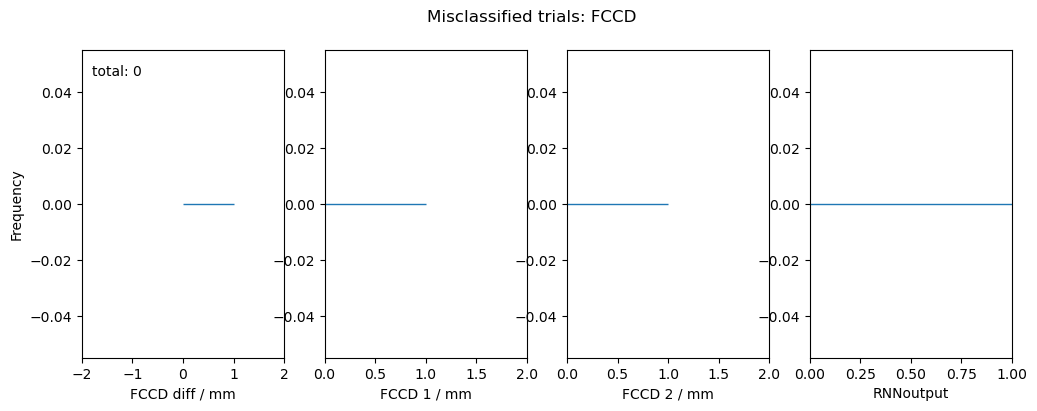

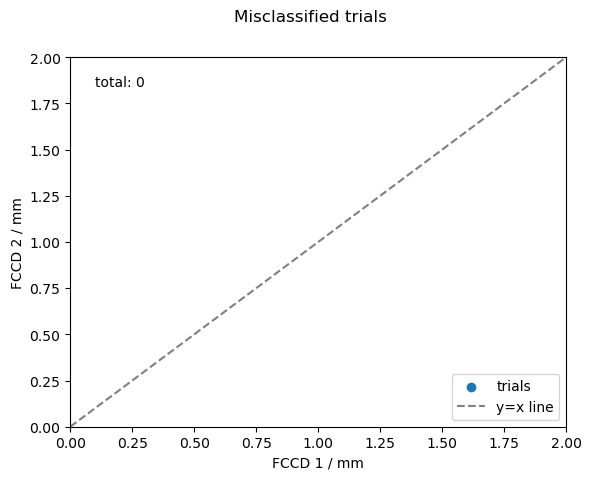

In [18]:
#testing
accuracies = test_RNN(RNNclassifier, test_loader, RNN_ID=RNN_ID, misclassified_trials_plots = True, save_results = True, train_restricted_test_fulldataset = True, roc_curve=True, FCCDonly=True)


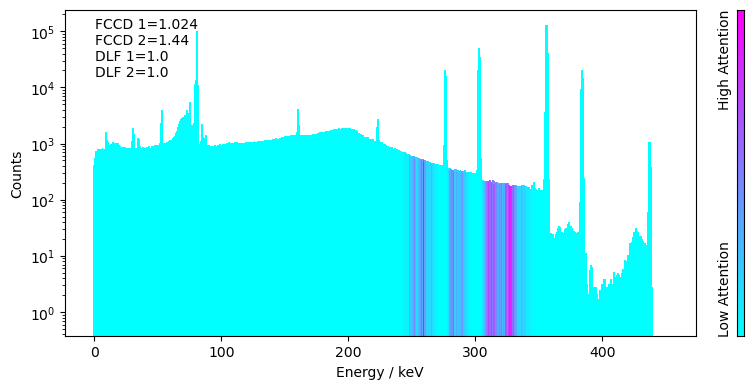

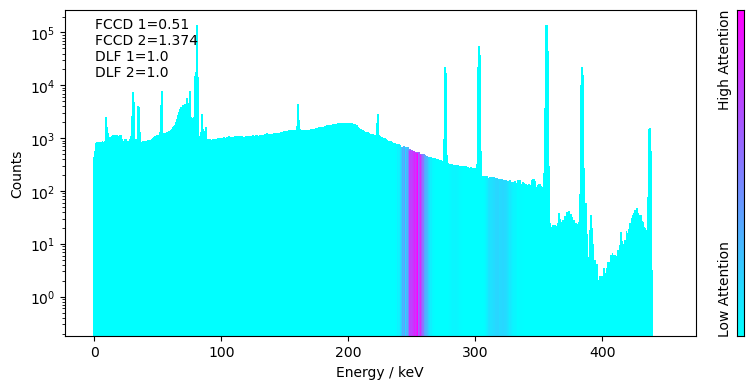

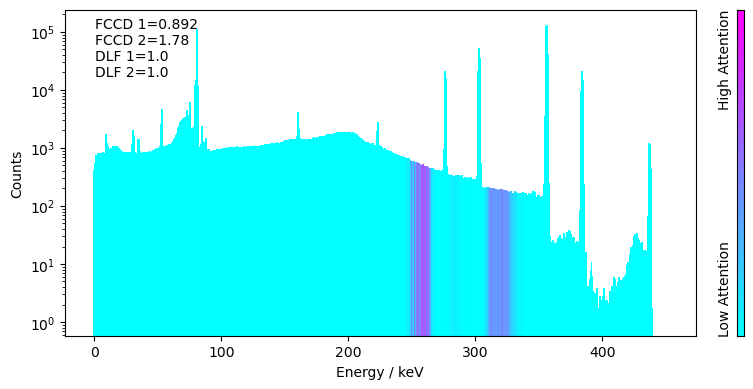

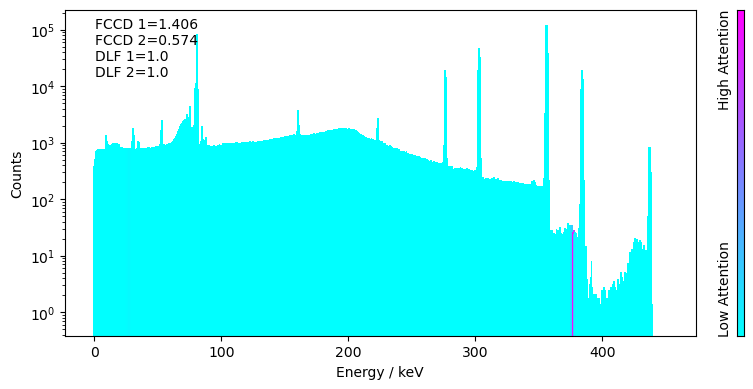

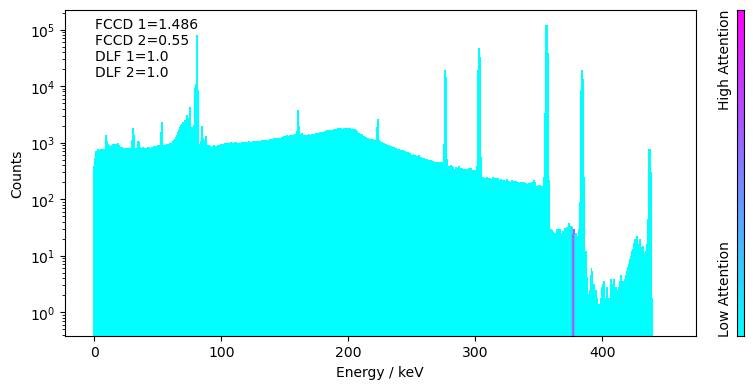

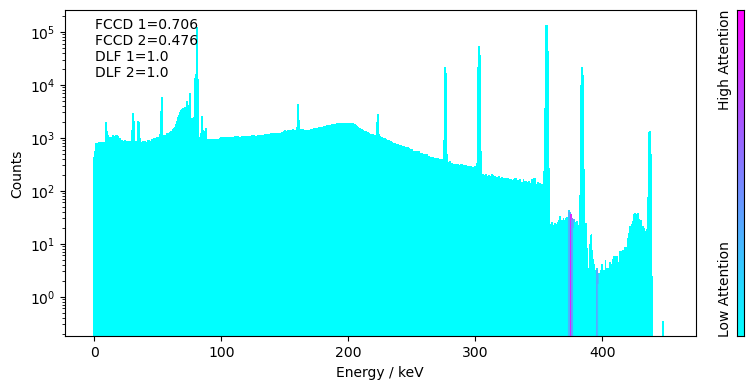

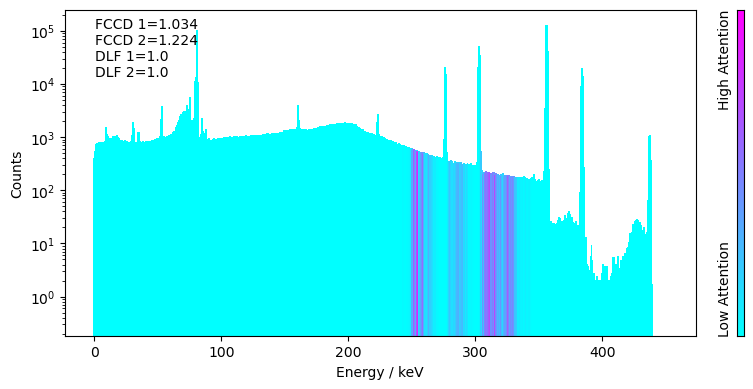

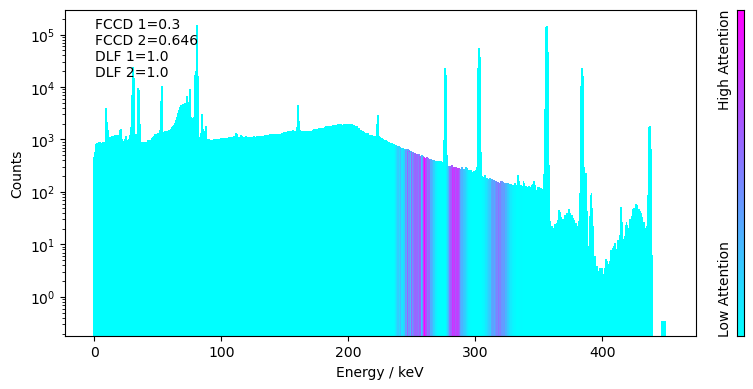

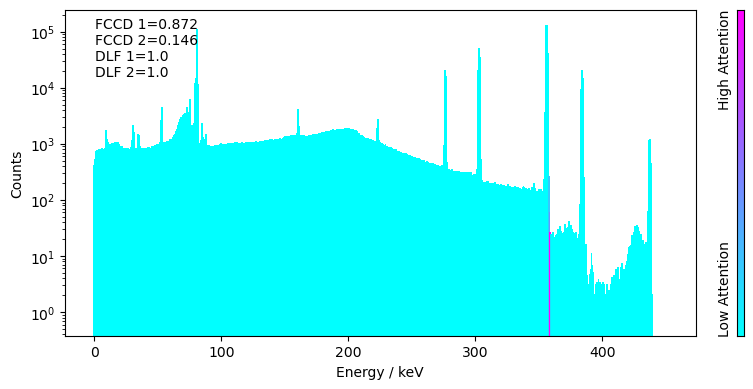

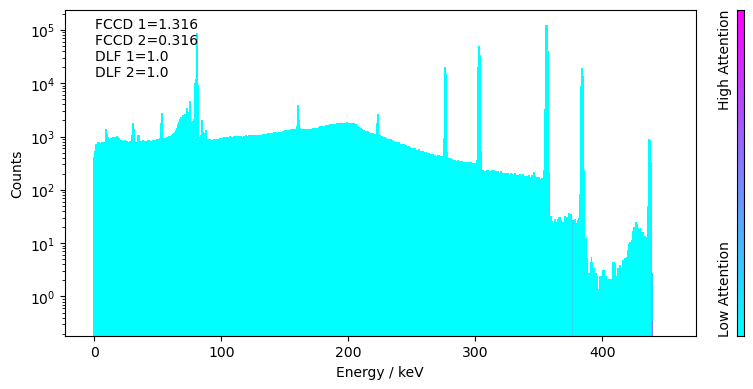

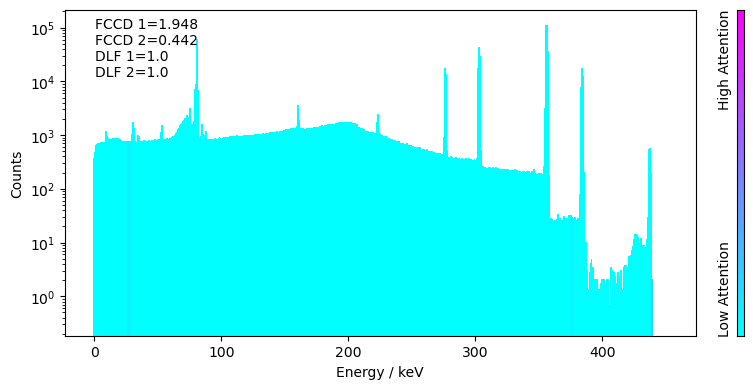

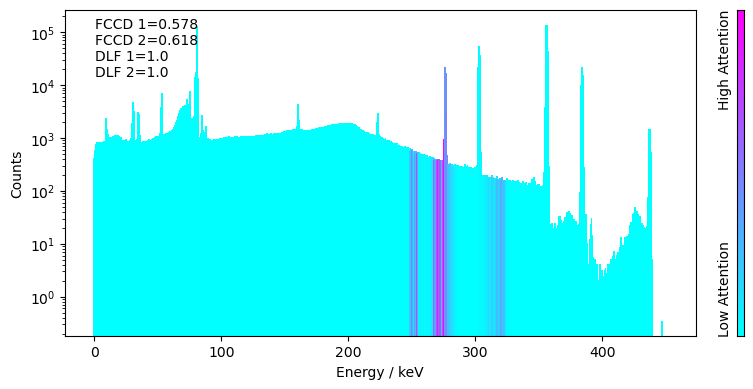

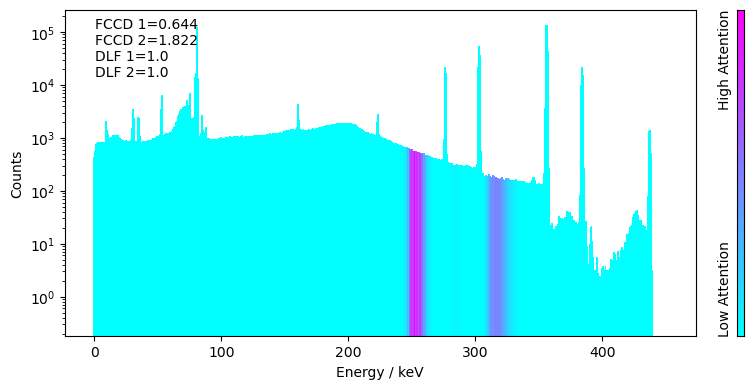

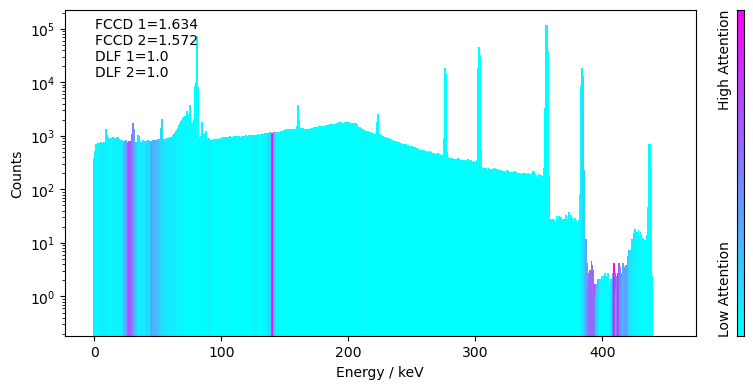

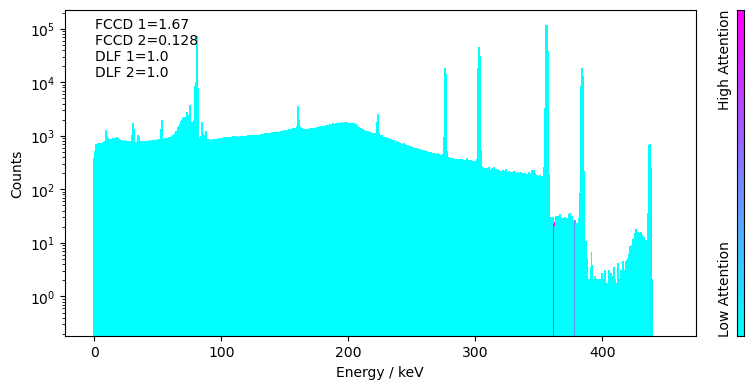

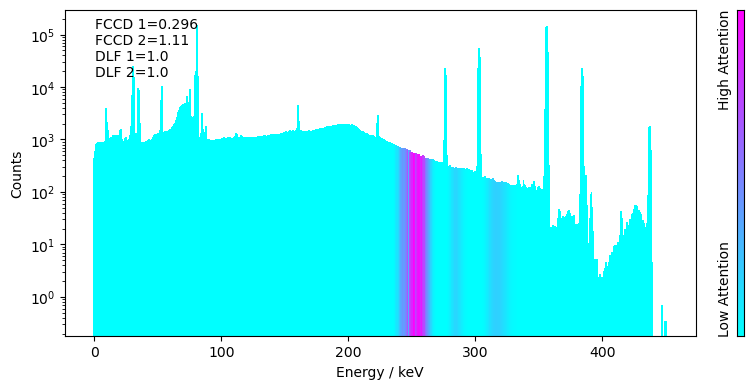

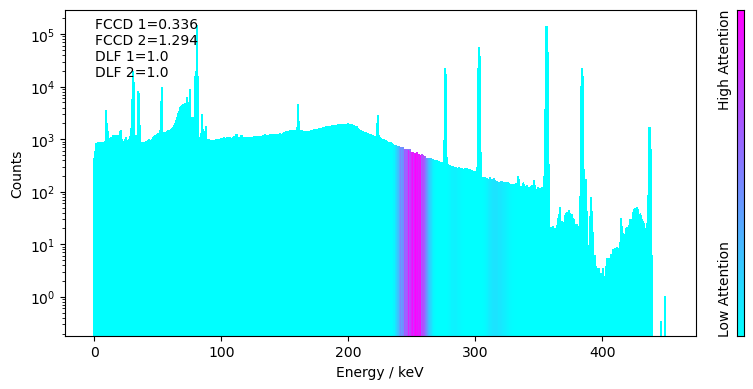

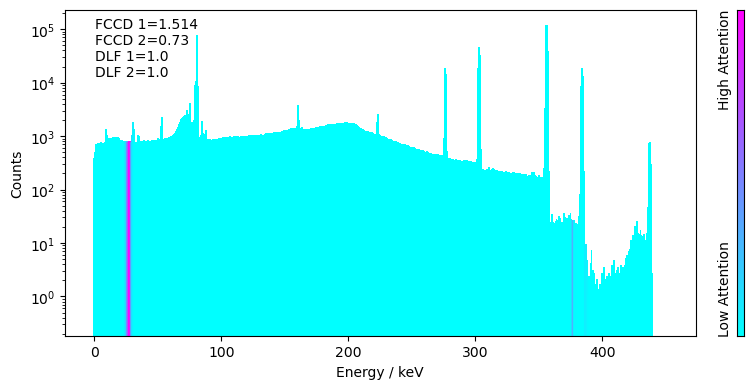

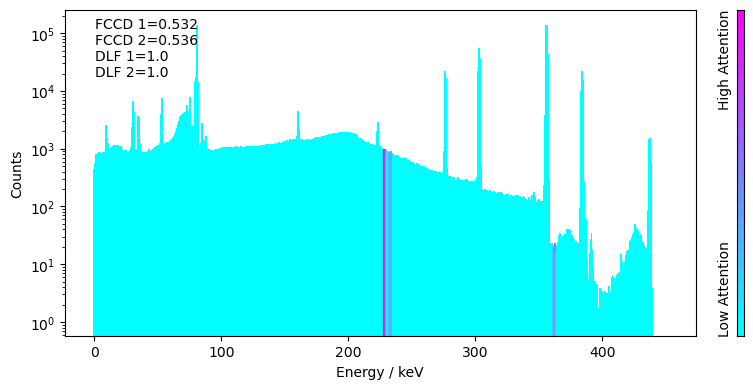

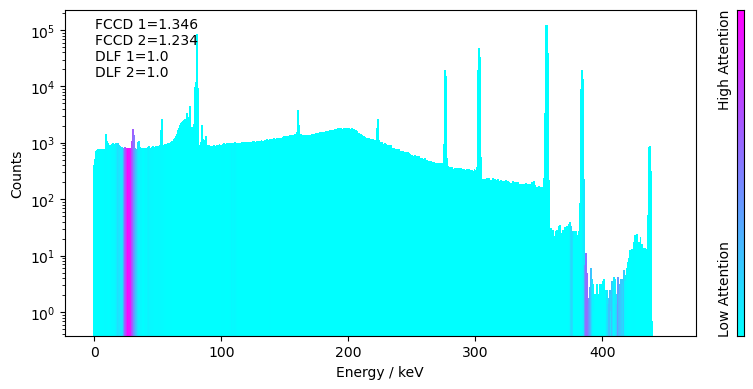

In [19]:
#Plot multple attention scores
plot_multiple_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True, FCCDonly=True)
    

100%|█████████████████████████████████████████████████████████████████████████| 750/750 [01:05<00:00, 11.53it/s]


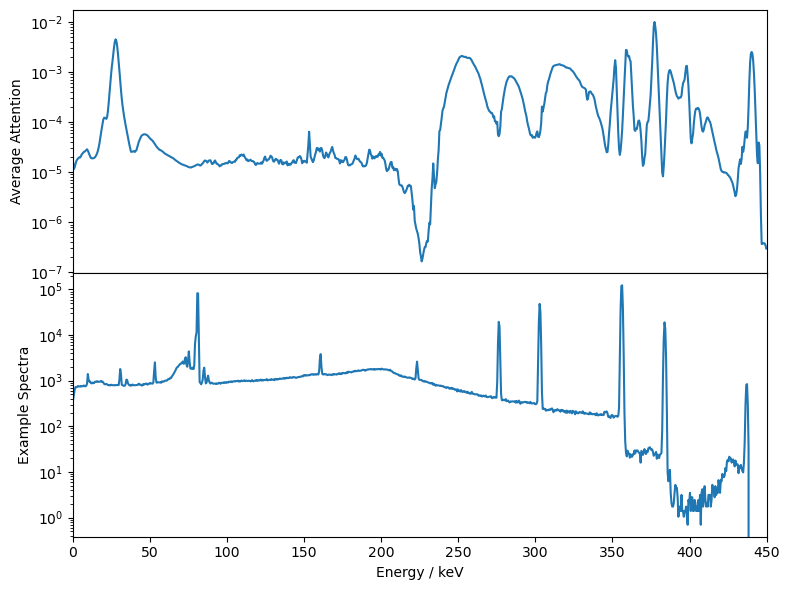

In [20]:
#Plot average attention score
average_attention = plot_average_attention(dataset, test_loader, model_path, attention_mechanism="normal", RNN_ID=RNN_ID, save_plots = True, train_restricted_test_fulldataset = True, FCCDonly=True)


## --------------------------------
# COMPARING RNNs
## --------------------------------

In [7]:
from tabulate import tabulate


LEARNING_RATE = 0.005 #0.01 #try modifying learning rate #0.001 too low for 30 epochs, 0.01 may be too high
dataset_size = 10000
maxFCCDdiff_list = ["NA", 0.5, 0.25, 0.1, 0.05]
NUM_EPOCHS_list = [20,20,20,20,20]

accuracy_FCCD_list = []
roc_auc_FCCD_list =  []

accuracy_FCCD_fulldataset_list = []
roc_auc_FCCD_fulldataset_list = []


for ind, maxFCCDdiff in enumerate(maxFCCDdiff_list):

    NUM_EPOCHS = NUM_EPOCHS_list[ind]
    if maxFCCDdiff == "NA":
        RNN_ID ="RNN_FCCDonly_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_fulldataset_"+str(dataset_size)+"trials"
    else:
        RNN_ID ="RNN_FCCDonly_"+str(NUM_EPOCHS)+"epochs_LR"+str(LEARNING_RATE)+"_maxFCCDdiff"+str(maxFCCDdiff)+"mm_"+str(dataset_size)+"trials"
    
    accuracies_path = CodePath+"/saved_models/"+RNN_ID+"/test_accuracies.json"
    with open(accuracies_path) as json_file:
        data=json.load(json_file)
    accuracy_FCCD_list.append(round(data["accuracy_FCCD"],3))
    
    roc_auc_FCCD_list.append(round(data["roc_auc_FCCD"],3))
    
    
    if maxFCCDdiff == "NA":
        accuracies_path = CodePath+"/saved_models/"+RNN_ID+"/test_accuracies.json"
    else:
        accuracies_path = CodePath+"/saved_models/"+RNN_ID+"/test_accuracies_fulldataset.json"
    with open(accuracies_path) as json_file:
        data=json.load(json_file)
    accuracy_FCCD_fulldataset_list.append(round(data["accuracy_FCCD"],3))
    
    roc_auc_FCCD_fulldataset_list.append(round(data["roc_auc_FCCD"],3))
    

headers = [r"Max($\Delta_{FCCD}$) /mm", r"Accuracy FCCD",  r"roc auc FCCD"]
    
print("Evaluated on restricted test dataset")
print(tabulate(list(zip(maxFCCDdiff_list, accuracy_FCCD_list ,roc_auc_FCCD_list)), headers=headers,tablefmt="double_outline"))   
print(tabulate(list(zip(maxFCCDdiff_list, accuracy_FCCD_list, roc_auc_FCCD_list)), headers=headers,tablefmt="latex_raw"))
    
print("")
print("Evaluated on full dataset")
print(tabulate(list(zip(maxFCCDdiff_list, accuracy_FCCD_fulldataset_list, roc_auc_FCCD_fulldataset_list)), headers=headers,tablefmt="double_outline"))   
print(tabulate(list(zip(maxFCCDdiff_list, accuracy_FCCD_fulldataset_list, roc_auc_FCCD_fulldataset_list)), headers=headers,tablefmt="latex_raw"))
    
    
#use: https://quicklatex.com/ to view latex table

Evaluated on restricted test dataset
╔════════════════════════════╦═════════════════╦════════════════╗
║ Max($\Delta_{FCCD}$) /mm   ║   Accuracy FCCD ║   roc auc FCCD ║
╠════════════════════════════╬═════════════════╬════════════════╣
║ NA                         ║           0.997 ║              1 ║
║ 0.5                        ║           1     ║              1 ║
║ 0.25                       ║           0.999 ║              1 ║
║ 0.1                        ║           0.99  ║              1 ║
║ 0.05                       ║           0.981 ║              1 ║
╚════════════════════════════╩═════════════════╩════════════════╝
\begin{tabular}{lrr}
\hline
 Max($\Delta_{FCCD}$) /mm   &   Accuracy FCCD &   roc auc FCCD \\
\hline
 NA                         &           0.997 &              1 \\
 0.5                        &           1     &              1 \\
 0.25                       &           0.999 &              1 \\
 0.1                        &           0.99  &              1 \\
 0.0